## Import, clean and merge data

In [124]:
import pandas as pd
import numpy as np

In [125]:
sail_data = pd.read_csv('detmacraceresults.csv', names=['Division_course', 'Year', 'Sail_No', 'Boat_name', 'Finish_time', 'Elapsed_Time', 'Corrected_Time', 'Boat_class', 'Division_placing'])

In [126]:
#count the number of DNFs per year; 2004 must have been a pretty bad year
list(sail_data[sail_data['Elapsed_Time'] == 'DNF'].groupby('Year'))

[(2002,
                      Division_course  Year    Sail_No  Boat_name Finish_time  \
  3559  Division I - PHRF Southampton  2002  USA 50996  Promotion         DNF   
  3663        Division V - Open Class  2002        T 1      Ollie         DNF   
  
       Elapsed_Time Corrected_Time      Boat_class Division_placing  
  3559          DNF            DNF  PHRF A / GL 50              138  
  3663          DNF            DNF            Open                8  ),
 (2004,
                                 Division_course  Year    Sail_No  \
  3025             Division I - PHRF Southampton  2004  USA 25443   
  3026             Division I - PHRF Southampton  2004    USA SM2   
  3092          Division III - PHRF Shore Course  2004  USA 15123   
  3093          Division III - PHRF Shore Course  2004  USA 40198   
  3094          Division III - PHRF Shore Course  2004  USA 15289   
  3095          Division III - PHRF Shore Course  2004     USA 19   
  3096          Division III - PHRF Shore C

In [127]:
sail_data.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing
0,Division I - Cove Island,2018,USA 52901,Blitzkrieg,Monday - 22:08:36,56:03:36,51:47:58,Class E,1
1,Division I - Cove Island,2018,USA 15370,Eliminator,Tuesday - 05:16:58,65:01:58,52:13:17,Class H,2
2,Division I - Cove Island,2018,USA 25668,Mostly Harmless,Tuesday - 03:50:40,61:55:40,52:34:36,Class F,3
3,Division I - Cove Island,2018,USA 25656,Liberty,Tuesday - 04:18:59,62:23:59,52:39:55,Class F,4
4,Division I - Cove Island,2018,USA 15004,Fast Tango,Tuesday - 04:41:04,62:46:04,52:43:30,Class F,5


In [128]:
sail_data_2019 = pd.read_csv('detmacraceresults_2019.csv', names=['Division_course', 'Year', 'Sail_No',\
    'Boat_name', 'Finish_time', 'Elapsed_Time', 'Corrected_Time', 'Boat_class', 'Division_placing'])

In [129]:
list(sail_data_2019[sail_data_2019['Elapsed_Time'] == 'DNF'].groupby('Year'))

[]

In [130]:
sail_data_2019.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing
0,Division I - Cove Island,2019,USA 25168,Stripes,Sunday - 21:49:33,32:09:33,35:47:58,Class B,1
1,Division I - Cove Island,2019,USA 323,Equation,Sunday - 21:31:28,31:51:28,35:50:01,Class B,2
2,Division I - Cove Island,2019,USA 70,Evolution,Sunday - 21:52:16,32:12:16,36:01:02,Class B,3
3,Division I - Cove Island,2019,USA 97999,Arctos,Sunday - 21:42:41,32:02:41,37:12:14,Class A,4
4,Division I - Cove Island,2019,USA 482,Talisman,Sunday - 23:30:28,33:50:28,37:22:02,Class B,5


In [131]:
sail_data['cln_elps_tm'] = sail_data['Elapsed_Time'].replace(['DNS', 'DNF', 'Retired'],np.nan)
sail_data['cln_crrct_tm'] = sail_data['Corrected_Time'].replace(['DNS', 'DNF', 'Retired'],np.nan)

In [132]:
list(sail_data[sail_data['Elapsed_Time'] == 'DNF'].groupby('Year'))

[(2002,
                      Division_course  Year    Sail_No  Boat_name Finish_time  \
  3559  Division I - PHRF Southampton  2002  USA 50996  Promotion         DNF   
  3663        Division V - Open Class  2002        T 1      Ollie         DNF   
  
       Elapsed_Time Corrected_Time      Boat_class Division_placing cln_elps_tm  \
  3559          DNF            DNF  PHRF A / GL 50              138         NaN   
  3663          DNF            DNF            Open                8         NaN   
  
       cln_crrct_tm  
  3559          NaN  
  3663          NaN  ),
 (2004,
                                 Division_course  Year    Sail_No  \
  3025             Division I - PHRF Southampton  2004  USA 25443   
  3026             Division I - PHRF Southampton  2004    USA SM2   
  3092          Division III - PHRF Shore Course  2004  USA 15123   
  3093          Division III - PHRF Shore Course  2004  USA 40198   
  3094          Division III - PHRF Shore Course  2004  USA 15289   
  30

In [133]:
sail_data_2019['cln_elps_tm'] = sail_data_2019['Elapsed_Time'].replace(['DNS', 'DNF', 'Retired'],np.nan)
sail_data_2019['cln_crrct_tm'] = sail_data_2019['Corrected_Time'].replace(['DNS', 'DNF', 'Retired'],np.nan)

In [134]:
def pdtime_cnvrt(dtafrm, timecolname):
    # new data frame with split value columns 
    new = dtafrm[timecolname].str.split(":", expand = True)
    # columns to overwrite and hold hh,mm,ss strngs
    dtafrm['hh'] = new[0]
    dtafrm['mm'] = new[1]
    dtafrm['ss'] = new[2]
    # create new time column in sec
    outptcolnam = timecolname +'_sec'
    dtafrm[outptcolnam] = pd.to_numeric(dtafrm['hh'], errors='coerce')*3600 +\
        pd.to_numeric(dtafrm['mm'], errors='coerce')*60 +\
        pd.to_numeric(dtafrm['ss'], errors='coerce')
    return dtafrm[outptcolnam]

In [135]:
sail_data['crctn_in_sec'] = pdtime_cnvrt(sail_data, 'cln_elps_tm') - pdtime_cnvrt(sail_data, 'cln_crrct_tm')

In [136]:
list(sail_data[sail_data['Elapsed_Time'] == 'DNF'].groupby('Year'))

[(2002,
                      Division_course  Year    Sail_No  Boat_name Finish_time  \
  3559  Division I - PHRF Southampton  2002  USA 50996  Promotion         DNF   
  3663        Division V - Open Class  2002        T 1      Ollie         DNF   
  
       Elapsed_Time Corrected_Time      Boat_class Division_placing cln_elps_tm  \
  3559          DNF            DNF  PHRF A / GL 50              138         NaN   
  3663          DNF            DNF            Open                8         NaN   
  
       cln_crrct_tm   hh   mm   ss  cln_elps_tm_sec  cln_crrct_tm_sec  \
  3559          NaN  NaN  NaN  NaN              NaN               NaN   
  3663          NaN  NaN  NaN  NaN              NaN               NaN   
  
        crctn_in_sec  
  3559           NaN  
  3663           NaN  ),
 (2004,
                                 Division_course  Year    Sail_No  \
  3025             Division I - PHRF Southampton  2004  USA 25443   
  3026             Division I - PHRF Southampton  2004 

In [137]:
sail_data_2019['crctn_in_sec'] = pdtime_cnvrt(sail_data_2019, 'cln_elps_tm') - pdtime_cnvrt(sail_data_2019, 'cln_crrct_tm')

In [138]:
sail_data['crctn_in_sec'].describe()

count    3.527000e+03
mean    -3.023422e+02
std      3.713643e+05
min     -2.201562e+07
25%     -5.694000e+03
50%      6.896000e+03
75%      2.118750e+04
max      7.190800e+04
Name: crctn_in_sec, dtype: float64

In [139]:
sail_data_2019['crctn_in_sec'].describe()

count      168.000000
mean     21309.773810
std      20066.201834
min     -44778.000000
25%      11171.250000
50%      22540.000000
75%      33600.500000
max      65603.000000
Name: crctn_in_sec, dtype: float64

In [140]:
sail_data = sail_data.loc[abs(sail_data['crctn_in_sec']) < 200000]
sail_data_2019 = sail_data_2019.loc[abs(sail_data['crctn_in_sec']) < 200000]

In [141]:
list(sail_data[sail_data['Elapsed_Time'] == 'DNF'].groupby('Year'))

[]

In [121]:
sail_data['crctn_in_sec'].describe()

count      3526.000000
mean       5941.368123
std       20378.704666
min     -116714.000000
25%       -5689.500000
50%        6903.000000
75%       21188.250000
max       71908.000000
Name: crctn_in_sec, dtype: float64

In [122]:
sail_data.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing,cln_elps_tm,cln_crrct_tm,hh,mm,ss,cln_elps_tm_sec,cln_crrct_tm_sec,crctn_in_sec
0,Division I - Cove Island,2018,USA 52901,Blitzkrieg,Monday - 22:08:36,56:03:36,51:47:58,Class E,1,56:03:36,51:47:58,51,47,58,201816.0,186478.0,15338.0
1,Division I - Cove Island,2018,USA 15370,Eliminator,Tuesday - 05:16:58,65:01:58,52:13:17,Class H,2,65:01:58,52:13:17,52,13,17,234118.0,187997.0,46121.0
2,Division I - Cove Island,2018,USA 25668,Mostly Harmless,Tuesday - 03:50:40,61:55:40,52:34:36,Class F,3,61:55:40,52:34:36,52,34,36,222940.0,189276.0,33664.0
3,Division I - Cove Island,2018,USA 25656,Liberty,Tuesday - 04:18:59,62:23:59,52:39:55,Class F,4,62:23:59,52:39:55,52,39,55,224639.0,189595.0,35044.0
4,Division I - Cove Island,2018,USA 15004,Fast Tango,Tuesday - 04:41:04,62:46:04,52:43:30,Class F,5,62:46:04,52:43:30,52,43,30,225964.0,189810.0,36154.0


In [123]:
#count the number of DNFs per year; 2004 must have been a pretty bad year
list(sail_data[sail_data['Elapsed_Time'] == 'DNF'].groupby('Year'))

[]

In [82]:
sail_data_2019.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing,cln_elps_tm,cln_crrct_tm,hh,mm,ss,cln_elps_tm_sec,cln_crrct_tm_sec,crctn_in_sec
0,Division I - Cove Island,2019,USA 25168,Stripes,Sunday - 21:49:33,32:09:33,35:47:58,Class B,1,32:09:33,35:47:58,35,47,58,115773,128878.0,-13105.0
1,Division I - Cove Island,2019,USA 323,Equation,Sunday - 21:31:28,31:51:28,35:50:01,Class B,2,31:51:28,35:50:01,35,50,01,114688,129001.0,-14313.0
2,Division I - Cove Island,2019,USA 70,Evolution,Sunday - 21:52:16,32:12:16,36:01:02,Class B,3,32:12:16,36:01:02,36,01,02,115936,129662.0,-13726.0
3,Division I - Cove Island,2019,USA 97999,Arctos,Sunday - 21:42:41,32:02:41,37:12:14,Class A,4,32:02:41,37:12:14,37,12,14,115361,133934.0,-18573.0
4,Division I - Cove Island,2019,USA 482,Talisman,Sunday - 23:30:28,33:50:28,37:22:02,Class B,5,33:50:28,37:22:02,37,22,02,121828,134522.0,-12694.0


In [83]:
merge_sail = pd.concat([sail_data_2019, sail_data], axis = 0)

In [84]:
merge_sail.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing,cln_elps_tm,cln_crrct_tm,hh,mm,ss,cln_elps_tm_sec,cln_crrct_tm_sec,crctn_in_sec
0,Division I - Cove Island,2019,USA 25168,Stripes,Sunday - 21:49:33,32:09:33,35:47:58,Class B,1,32:09:33,35:47:58,35,47,58,115773.0,128878.0,-13105.0
1,Division I - Cove Island,2019,USA 323,Equation,Sunday - 21:31:28,31:51:28,35:50:01,Class B,2,31:51:28,35:50:01,35,50,01,114688.0,129001.0,-14313.0
2,Division I - Cove Island,2019,USA 70,Evolution,Sunday - 21:52:16,32:12:16,36:01:02,Class B,3,32:12:16,36:01:02,36,01,02,115936.0,129662.0,-13726.0
3,Division I - Cove Island,2019,USA 97999,Arctos,Sunday - 21:42:41,32:02:41,37:12:14,Class A,4,32:02:41,37:12:14,37,12,14,115361.0,133934.0,-18573.0
4,Division I - Cove Island,2019,USA 482,Talisman,Sunday - 23:30:28,33:50:28,37:22:02,Class B,5,33:50:28,37:22:02,37,22,02,121828.0,134522.0,-12694.0


In [92]:
merge_sail['Division_only'] = merge_sail['Division_course'].str.slice(0,12)

In [93]:
merge_sail.head()

,Division_course,Year,Sail_No,Boat_name,Finish_time,Elapsed_Time,Corrected_Time,Boat_class,Division_placing,cln_elps_tm,cln_crrct_tm,hh,mm,ss,cln_elps_tm_sec,cln_crrct_tm_sec,crctn_in_sec,Division_only
0,Division I - Cove Island,2019,USA 25168,Stripes,Sunday - 21:49:33,32:09:33,35:47:58,Class B,1,32:09:33,35:47:58,35,47,58,115773.0,128878.0,-13105.0,Division I -
1,Division I - Cove Island,2019,USA 323,Equation,Sunday - 21:31:28,31:51:28,35:50:01,Class B,2,31:51:28,35:50:01,35,50,01,114688.0,129001.0,-14313.0,Division I -
2,Division I - Cove Island,2019,USA 70,Evolution,Sunday - 21:52:16,32:12:16,36:01:02,Class B,3,32:12:16,36:01:02,36,01,02,115936.0,129662.0,-13726.0,Division I -
3,Division I - Cove Island,2019,USA 97999,Arctos,Sunday - 21:42:41,32:02:41,37:12:14,Class A,4,32:02:41,37:12:14,37,12,14,115361.0,133934.0,-18573.0,Division I -
4,Division I - Cove Island,2019,USA 482,Talisman,Sunday - 23:30:28,33:50:28,37:22:02,Class B,5,33:50:28,37:22:02,37,22,02,121828.0,134522.0,-12694.0,Division I -


In [94]:
merge_sail['crctn_in_sec'].describe()

count      3694.000000
mean       6640.310233
std       20612.216799
min     -116714.000000
25%       -5480.000000
50%        7378.000000
75%       21681.750000
max       71908.000000
Name: crctn_in_sec, dtype: float64

In [ ]:
merge_sail.to_csv('detmacrace_merge_sail.csv')

## Graphical analysis

In [99]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

(array([1.000e+00, 2.000e+00, 1.200e+01, 8.500e+01, 1.860e+02, 7.810e+02,
        1.169e+03, 1.102e+03, 1.710e+02, 1.700e+01]),
 array([-116714. ,  -97851.8,  -78989.6,  -60127.4,  -41265.2,  -22403. ,
          -3540.8,   15321.4,   34183.6,   53045.8,   71908. ]),
 <a list of 10 Patch objects>)

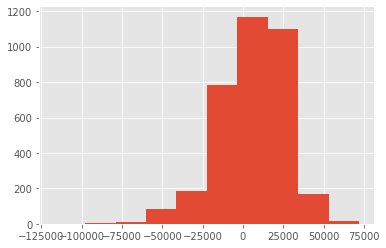

In [96]:
plt.hist(sail_data['crctn_in_sec'])

Text(0, 0.5, 'Correction in seconds')

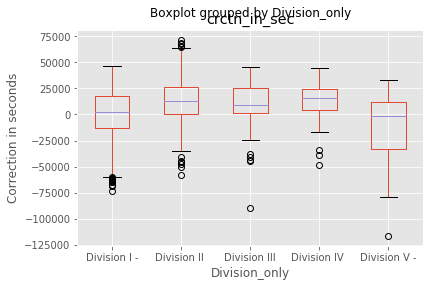

In [97]:
merge_sail.boxplot(by='Division_only', column='crctn_in_sec')
plt.ylabel('Correction in seconds')

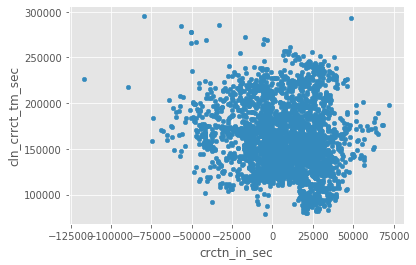

In [98]:
merge_sail.plot.scatter('crctn_in_sec', 'cln_crrct_tm_sec')

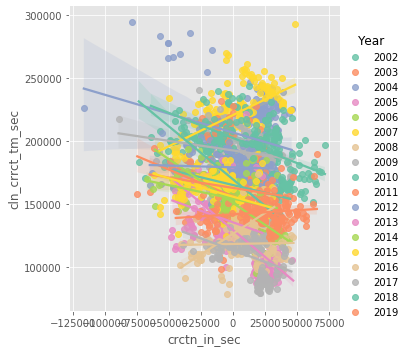

In [100]:
sns.lmplot("crctn_in_sec", "cln_crrct_tm_sec", merge_sail, hue="Year", palette="Set2")

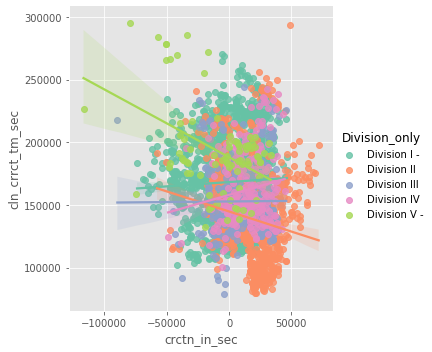

In [101]:
sns.lmplot("crctn_in_sec", "cln_crrct_tm_sec", merge_sail, hue="Division_only", palette="Set2")

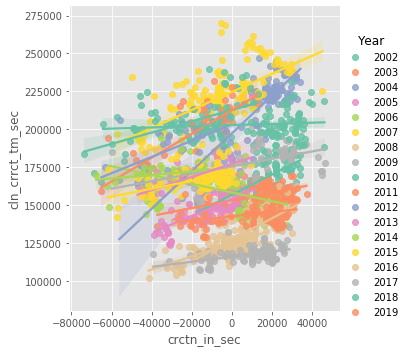

In [102]:
sns.lmplot("crctn_in_sec", "cln_crrct_tm_sec", merge_sail[merge_sail['Division_only']\
            =='Division I -'], hue="Year", palette="Set2")

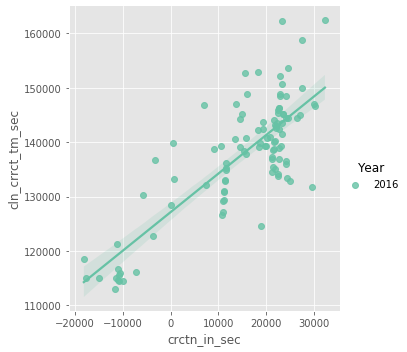

In [103]:
sns.lmplot("crctn_in_sec", "cln_crrct_tm_sec", merge_sail[(merge_sail['Division_only']\
    =='Division I -') & (merge_sail['Year']==2016)], hue="Year", palette="Set2")

In [142]:
#this won't work until I can fix the filter for crazy corrections
#sail_data[sail_data['Elapsed_Time']== 'DNF'].groupby('Year')['Elapsed_Time'].count().plot.bar(color='b')

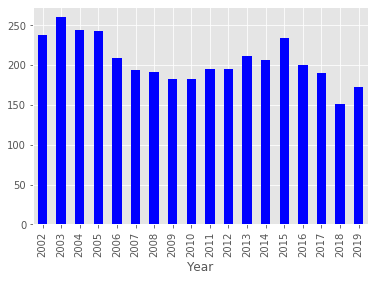

In [143]:
merge_sail.groupby('Year')['Elapsed_Time'].count().plot.bar(color='b')

In [144]:
!ls

Detmacrace_clean.py                  detmackrace.py
Detmacrace_clean_fxn042420_1126a.py  detmacrace_2019.py
Detmacrace_clean_hold042420_1126a.py detmacraceresults.csv
Devens_NYCDSA_webscrape_v2.ipynb     detmacraceresults_2019.csv
README.md


In [159]:
from Detmacrace_clean_fxn042420_1126a import twofile_clean_merge, pdtime_cnvrt

In [160]:
twofile_clean_merge('detmacraceresults.csv', 'detmacraceresults_2019.csv')

NameError: name 'pd' is not defined